<a href="https://colab.research.google.com/github/SergJvcr/-Colored-squares/blob/main/Floor_VS_Ceiling_Corners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The project: "Floor VS Ceiling Corners"**

---


**Import Data**

In [104]:
import pandas as pd
import numpy as np

In [105]:
extracted_data = pd.read_json('/deviation.json')

**Data Exploration**

In [106]:
extracted_data.head(5)

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029


In [107]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1346
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1347 non-null   object 
 1   gt_corners    1347 non-null   int64  
 2   rb_corners    1347 non-null   int64  
 3   mean          1347 non-null   float64
 4   max           1347 non-null   float64
 5   min           1347 non-null   float64
 6   floor_mean    1347 non-null   float64
 7   floor_max     1347 non-null   float64
 8   floor_min     1347 non-null   float64
 9   ceiling_mean  1347 non-null   float64
 10  ceiling_max   1347 non-null   float64
 11  ceiling_min   1347 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 136.8+ KB


In [108]:
extracted_data.describe(include='all')

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
count,1347,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
unique,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Master Bedroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.307350,4.307350,12.895320,25.448011,2.920388,11.022443,20.405499,3.146246,14.768198,24.848020,5.521437
std,NaN,0.814412,0.814412,21.839948,42.758159,9.258972,19.136320,33.189081,9.559611,26.047057,42.345579,14.460565
min,NaN,4.000000,4.000000,0.192973,0.323886,0.007456,0.134686,0.178059,0.007456,0.123169,0.220846,0.009268
25%,NaN,4.000000,4.000000,0.658488,1.243804,0.147432,0.514150,0.888043,0.164668,0.742915,1.180960,0.306071
50%,NaN,4.000000,4.000000,2.123456,4.703514,0.279876,1.932503,4.008014,0.304374,2.159995,3.777277,0.600597
75%,NaN,4.000000,4.000000,14.810982,28.312051,0.674444,13.430288,24.986504,0.801416,15.150233,27.551533,1.840563


*The same values of mean and standard deviation for gt_corners and rb_corners!*

**Visualize Model Results**

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

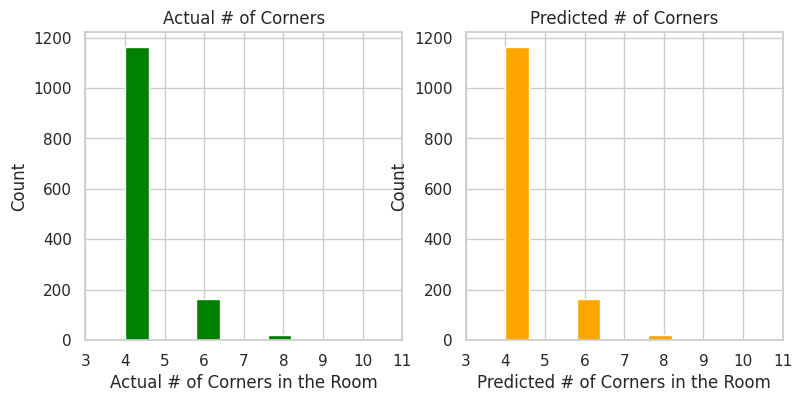

In [110]:
figure, axis = plt.subplots(1, 2, figsize=(9,4))

# Actual # of Corners - gt_corners
axis[0].hist(data=extracted_data, x='gt_corners', histtype ='bar', color='green')
axis[0].set_title('Actual # of Corners')
axis[0].set_ylabel('Count')
axis[0].set_xlabel('Actual # of Corners in the Room')
axis[0].set_xticks(np.arange(3, 12, step=1))

# Predicted # of Corners - gt_corners
axis[1].hist(data=extracted_data, x='rb_corners', histtype ='bar', color='orange')
axis[1].set_title('Predicted # of Corners')
axis[1].set_ylabel('Count')
axis[1].set_xlabel('Predicted # of Corners in the Room')
axis[1].set_xticks(np.arange(3, 12, step=1))

plt.show()

*We know that the maximum number of corners is 10, but because of the large skew towards 4 corners, the charts do NOT show rooms with 10 corners. We can use a mask to split the data and show the rooms with 0-5 and 6-10 corners separately, or we can plot the 'Actual VS Predicted # of Corners' comparison graph. Let's it.*

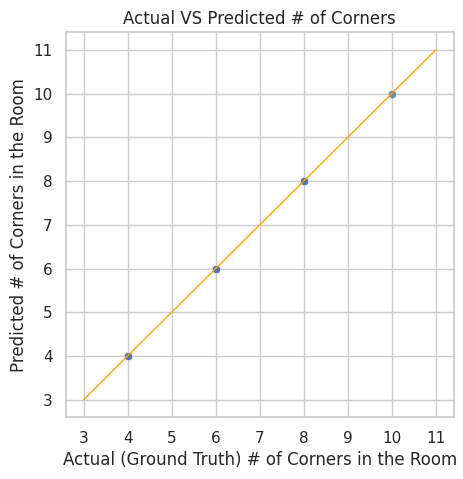

In [111]:
# Create a scatterplot to visualize "predicted"(rb_corners) over "actual"(gt_corners)
plt.figure(figsize=(5,5))
plt.title('Actual VS Predicted # of Corners')
sns.set_theme(style='whitegrid')
sns.scatterplot(data=extracted_data, x='gt_corners', y='rb_corners', alpha=0.8)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([3,11], [3,11], c='orange', linewidth=1)
plt.xlabel('Actual (Ground Truth) # of Corners in the Room')
plt.xticks(np.arange(3, 12, step=1))
plt.ylabel('Predicted # of Corners in the Room')
plt.yticks(np.arange(3, 12, step=1))
plt.show()

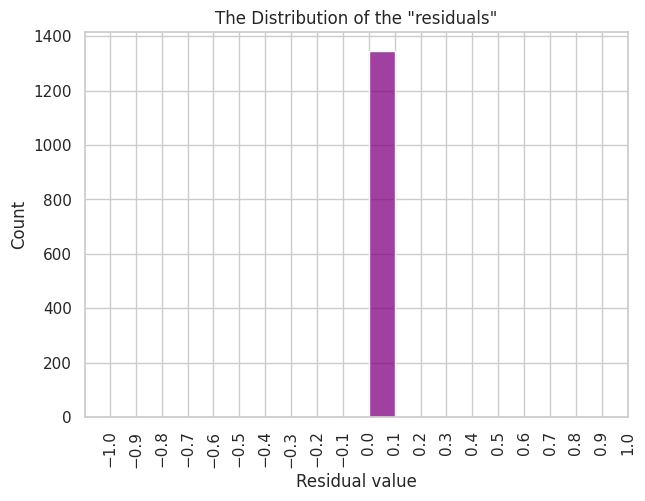

In [113]:
# Visualize the distribution of the "residuals" (the differences between the predicted values and the actual values of the response variable)
plt.figure(figsize=(7,5))
plt.title('The Distribution of the "residuals"')
extracted_data['residuals'] = extracted_data['gt_corners'] - extracted_data['rb_corners']
sns.histplot(extracted_data['residuals'], bins=np.arange(-1,1,0.1), color='purple')
plt.xlabel('Residual value')
plt.xticks(np.arange(-1, 1.1, step=0.1), rotation=90)
plt.ylabel('Count')
plt.show()


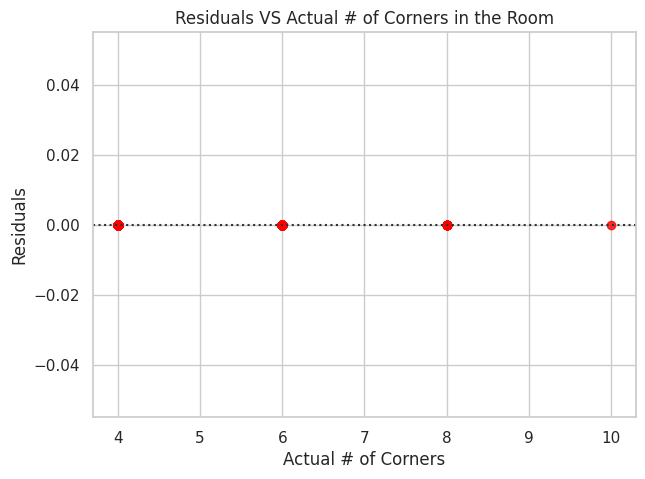

In [116]:
plt.figure(figsize=(7,5))
plt.title('Residuals VS Actual # of Corners in the Room')
sns.residplot(data=extracted_data, x='gt_corners', y='residuals', dropna=True, color='red')
plt.xlabel('Actual # of Corners')
plt.ylabel('Residuals')
plt.show()

The residual mean is 0.0.


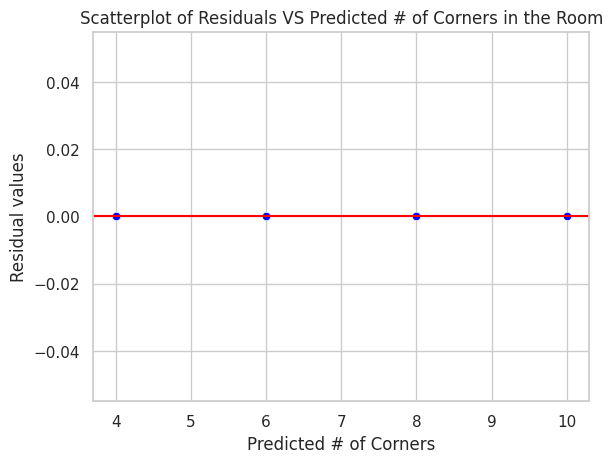

In [126]:
# Calculate residual mean
print(f"The residual mean is {extracted_data['residuals'].mean()}.")
# Create a scatterplot of "residuals" over "predicted values" (rb_corners)
sns.scatterplot(data=extracted_data, x='rb_corners', y='residuals', color='blue')
plt.axhline(0, c='red')
plt.title('Scatterplot of Residuals VS Predicted # of Corners in the Room')
plt.xlabel('Predicted # of Corners')
plt.ylabel('Residual values')
plt.show()

*It looks like the model predicted the correct number of angles in all cases. There may have been a data leak when training the model.*

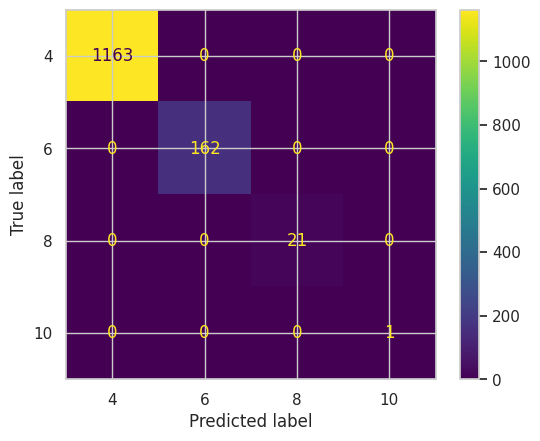

In [130]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Plot a confusion matrix of the model's predictions
# Generate array of values for confusion matrix
cm = confusion_matrix(extracted_data['rb_corners'], extracted_data['gt_corners'], labels=[4, 6, 8, 10])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=[4, 6, 8, 10],
                             )
disp.plot(values_format='')
plt.show()

The confusion matrix showed that the number of correctly predicted number of corners in the room is equal to the true number of corners in the room.
So either there was a data leak, or the model was tested on the same dataset it was trained on, or I'm missing something. I need to contact the owner of the database and find out some questions:
- how the database was built,
- what was the objective of the model (in detail),
- how some data were collected (columns: mean, max,	min	floor_mean,	floor_max,	floor_min, ceiling_mean,	ceiling_max, ceiling_min) and what they mean.